In [1]:
# Install Dependencies

#! pip3 install PyMySQL

#! pip3 install wordcloud

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelsambou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelsambou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import pymysql
import pandas as pd
import nltk
import itertools
from nltk.corpus import stopwords
from string import punctuation
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Create Database Connection

In [24]:
connection = pymysql.connect(host='localhost',
                             user='phpmyadmin',
                             password='Account@2021',
                             database='whatsapp_chat_analyzer',
                             cursorclass=pymysql.cursors.DictCursor)

### Simple Query

In [25]:
query = pd.read_sql_query('''select message from analyser_messagelog where chat_file_id = 10''', connection)
query.head()

,message
0,Good morning esteemed businesspeople natumai ...
1,Yes it's very important that you score 70% and...
2,Ulifanya maswali online?
3,Ok be patient for your turn
4,Sawa nashukuru na bado nasubiri


### Creating Data Frame

In [26]:
df = pd.DataFrame(query, columns=['message'])


### Tokenizing Data Frame

In [27]:
df['tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['message']), axis=1)

In [28]:
listOfWords = df['tokenized'].tolist()

tokens = list(itertools.chain(*listOfWords))
print("Len of tokens")
print(len(tokens))
#tokens

Len of tokens
45993


### Filtering Words


In [29]:
stopwords = stopwords.words('english')
punctuation = list(punctuation)


In [30]:
cleaned_tokens = [token for token in tokens if token not in stopwords and token not in punctuation]
print("Len of cleaned")
print(len(cleaned_tokens))

Len of cleaned
34431


### Frequency Distribution

In [31]:
fdist = FreqDist(cleaned_tokens)
fdist

myList1 = list(fdist.values())
newList = sorted(myList1)

uniqueValues = set(newList)
uniqueValues = list(uniqueValues)
len(uniqueValues)

length = len(uniqueValues) if len(uniqueValues)%2 == 0 else len(uniqueValues)+1
length = round(length/2)
unq = uniqueValues[length :]


filteredDict = dict()
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in fdist.items():
   # Check if key is even then add pair to new dictionary
    if fdist[key] in unq and not len(key) == 1:       #newDict[key] = value
        filteredDict[key] = value
        #print(key)
#print('Filtered Dictionary : ')
#print(newDict)
#fdist


### Generating WordCloud

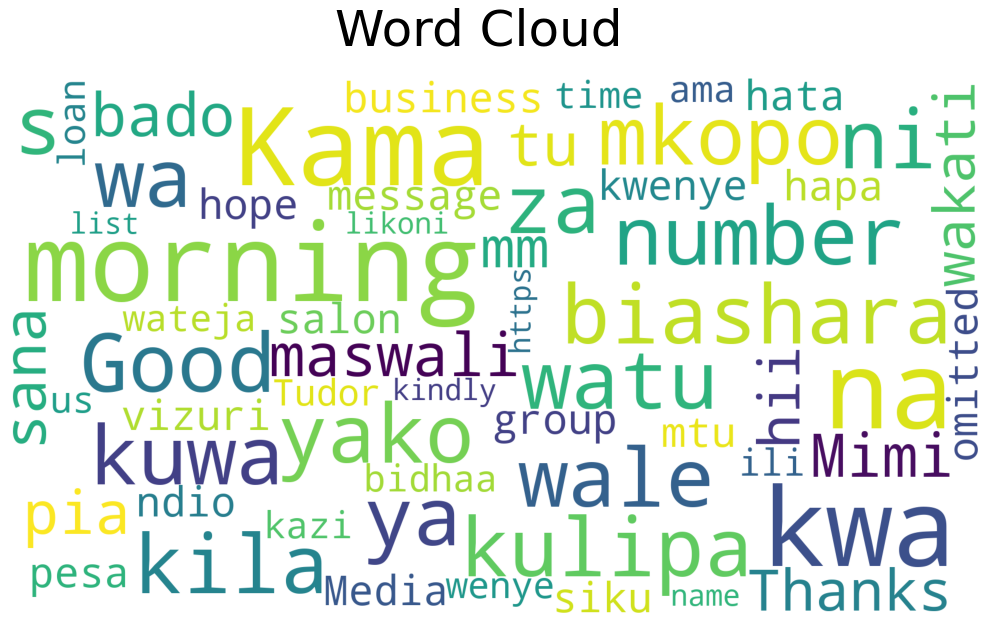

In [41]:
cleaned_tokens_mm = ' '.join(filteredDict)
#print(cleaned_tokens_mm)

wordcloud = WordCloud(width=1800, height=1000, max_font_size=200, background_color="white").generate(cleaned_tokens_mm)
# plt the image generated by WordCloud class
plt.figure(figsize=(20,10))
plt.suptitle('Word Cloud', fontsize=50)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()